In [76]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [77]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


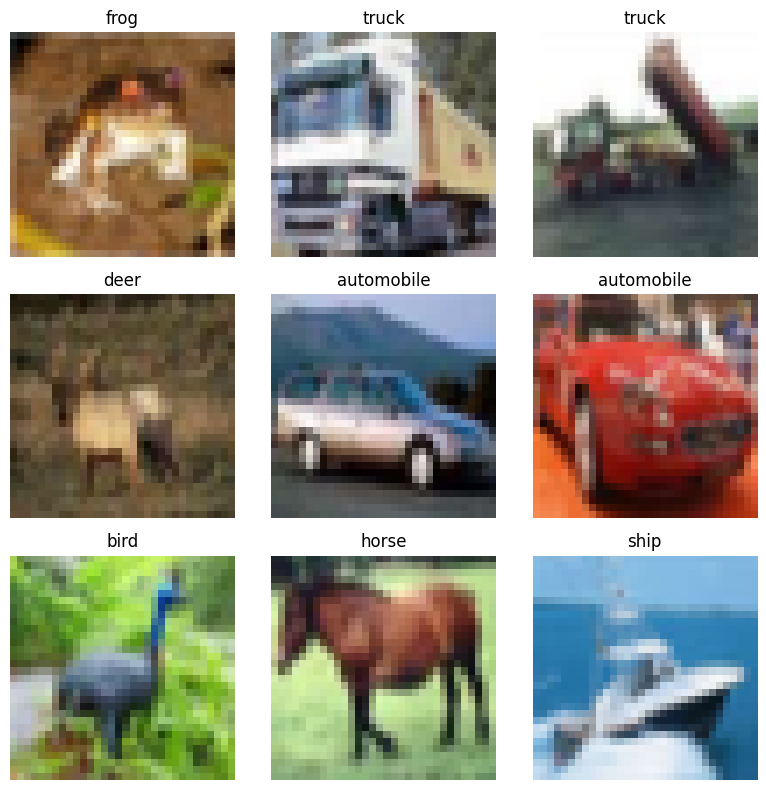

In [78]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [79]:
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0


In [80]:
model_1 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_1.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_760 (Conv2D)             │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,914 (3.52 MB)

 Trainable params: 923,914 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_0 = model_1.fit(
    X_train, y_train_cat,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3434 - loss: 1.8360 - val_accuracy: 0.5193 - val_loss: 1.3647
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5305 - loss: 1.3262 - val_accuracy: 0.5476 - val_loss: 1.3072
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5788 - loss: 1.1944 - val_accuracy: 0.5793 - val_loss: 1.2070
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6116 - loss: 1.1143 - val_accuracy: 0.6016 - val_loss: 1.1627
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6374 - loss: 1.0434 - val_accuracy: 0.6043 - val_loss: 1.1421
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6594 - loss: 0.9776 - val_accuracy: 0.6226 - val_loss: 1.0986
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6754 - loss: 0.9419 - val_accuracy: 0.6151 - val_loss: 1.1182
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6950 - loss: 0.8767 - val_accuracy: 0.

In [82]:
test_loss, test_acc = model_1.evaluate(X_test_inc, y_test_cat)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8266 - loss: 0.5154
Test accuracy: 0.824999988079071
Test loss: 0.5082589983940125


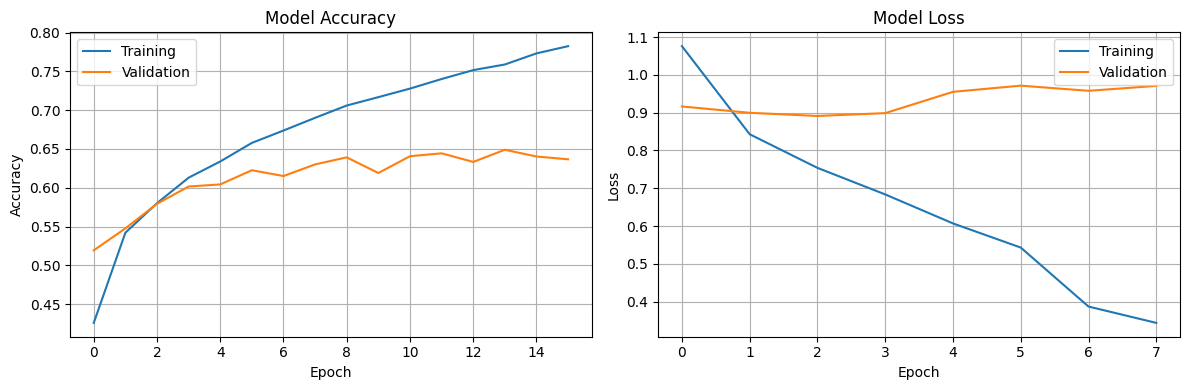

In [83]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_0.history['accuracy'], label='Training')
plt.plot(history_0.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Deep Model


In [84]:
model_2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_2.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_761 (Conv2D)             │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_762 (Conv2D)             │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_763 (Conv2D)             │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_764 (Conv2D)             │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,994 (1.82 MB)

 Trainable params: 477,994 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
history_2 = model_2.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2801 - loss: 1.9203 - val_accuracy: 0.5156 - val_loss: 1.3532
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5003 - loss: 1.3840 - val_accuracy: 0.5860 - val_loss: 1.1450
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5760 - loss: 1.1947 - val_accuracy: 0.6206 - val_loss: 1.0546
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6170 - loss: 1.0887 - val_accuracy: 0.6630 - val_loss: 0.9531
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6454 - loss: 1.0054 - val_accuracy: 0.6896 - val_loss: 0.8839
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6725 - loss: 0.9325 - val_accuracy: 0.7004 - val_loss: 0.8679
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6896 - loss: 0.8758 - val_accuracy: 0.7188 - val_loss: 0.8049
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7016 - loss: 0.8506 - val_accuracy: 0.

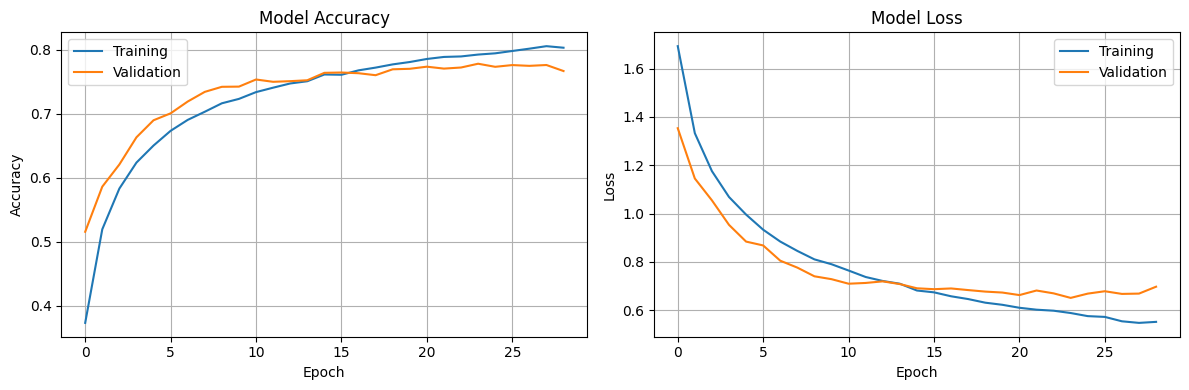

In [86]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training')
plt.plot(history_2.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training')
plt.plot(history_2.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [87]:
loss_1, acc_1 = model_1.evaluate(X_test, y_test_cat, verbose=0)
loss_2, acc_2 = model_2.evaluate(X_test, y_test_cat, verbose=0)

print(f"Model 1 Accuracy: {acc_1:.4f}")
print(f"Model 2 Accuracy: {acc_2:.4f}")


Model 1 Accuracy: 0.6339
Model 2 Accuracy: 0.7772


In [41]:
y_pred_1 = np.argmax(model_1.predict(X_test), axis=1)
y_pred_2 = np.argmax(model_2.predict(X_test), axis=1)

print("MODEL 1 REPORT")
print(classification_report(y_test, y_pred_1, target_names=class_names))

print("MODEL 2 REPORT")
print(classification_report(y_test, y_pred_2, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
MODEL 1 REPORT
              precision    recall  f1-score   support

    airplane       0.66      0.76      0.70      1000
  automobile       0.73      0.79      0.76      1000
        bird       0.50      0.49      0.49      1000
         cat       0.51      0.42      0.46      1000
        deer       0.65      0.45      0.53      1000
         dog       0.58      0.51      0.54      1000
        frog       0.65      0.82      0.72      1000
       horse       0.64      0.77      0.70      1000
        ship       0.75      0.78      0.77      1000
       truck       0.77      0.67      0.71      1000

    accuracy                           0.65     10000
   macro avg       0.64      0.65      0.64     10000
weighted avg       0.64      0.65      0.64     10000

MODEL 2 REPORT
              precision    recall  f1-score   support

    airplane       0.79      0.80      0.79      1000
  automobile       0

# Learning tranfer inceptionv3

In [88]:
IMG_SIZE = 96

X_train_resized = tf.image.resize(X_train, (IMG_SIZE, IMG_SIZE))
X_test_resized = tf.image.resize(X_test, (IMG_SIZE, IMG_SIZE))


In [89]:
X_train_inc = preprocess_input(X_train_resized)
X_test_inc = preprocess_input(X_test_resized)


In [90]:
# Load InceptionV3 base model
base_model = InceptionV3(
    input_shape=(96, 96, 3),   # valid (minimum is 75x75)
    include_top=False,
    weights='imagenet'
)

# Freeze base model
base_model.trainable = False


model_inception = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(), # Pool spatial features into a vector
    layers.Dense(128, activation='relu'), # Fully connected layer to learn new patterns
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (Fashion MNIST)
])


In [91]:
model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [92]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.3)
]


In [93]:
history_3 = model_inception.fit(
    X_train_inc,
    y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=callbacks
)
test_loss, test_acc = model_inception.evaluate(X_test_inc, y_test_cat)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)



Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 30ms/step - accuracy: 0.2679 - loss: 2.0218 - val_accuracy: 0.3735 - val_loss: 1.7641 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3792 - loss: 1.7591 - val_accuracy: 0.3886 - val_loss: 1.7022 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4070 - loss: 1.6934 - val_accuracy: 0.4123 - val_loss: 1.6677 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4136 - loss: 1.6594 - val_accuracy: 0.4220 - val_loss: 1.6399 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4292 - loss: 1.6254 - val_accuracy: 0.4200 - val_loss: 1.6452 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4389 - loss: 1.6012 - val_accuracy: 0.4437 - val_loss: 1.5910 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4449 - loss: 1

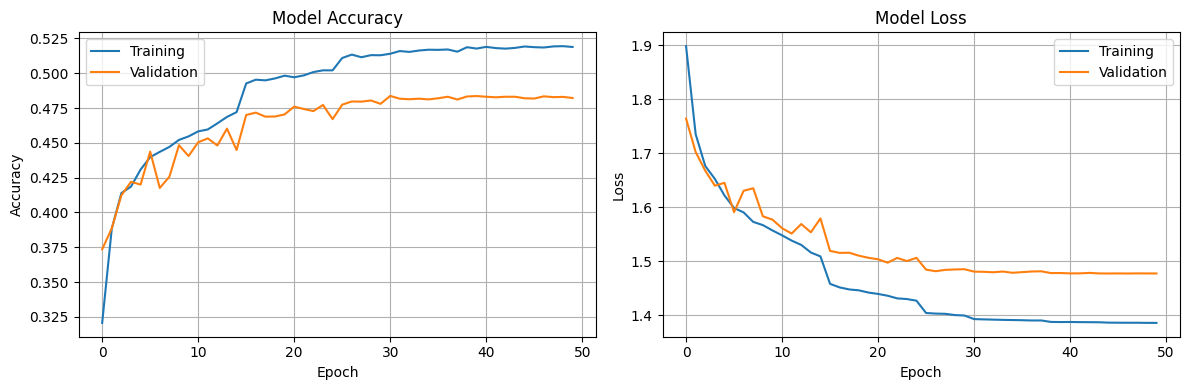

In [96]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Training')
plt.plot(history_3.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Training')
plt.plot(history_3.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The initial model performed adequately as an experimental baseline, achieving an accuracy of 69.39%. However, its performance confirms that simply reusing a pretrained model without additional adjustments is insufficient for more demanding classification tasks, thereby justifying the need to apply improvement techniques such as data augmentation, classifier optimization, and fine-tuning of the base model.


313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step
              precision    recall  f1-score   support

           0       0.11      0.96      0.19      1000
           1       0.43      0.04      0.07      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.02      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.01      0.00      0.00      1000
           7       0.27      0.15      0.19      1000
           8       0.17      0.01      0.01      1000
           9       0.11      0.00      0.01      1000

    accuracy                           0.12     10000
   macro avg       0.11      0.12      0.05     10000
weighted avg       0.11      0.12      0.05     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


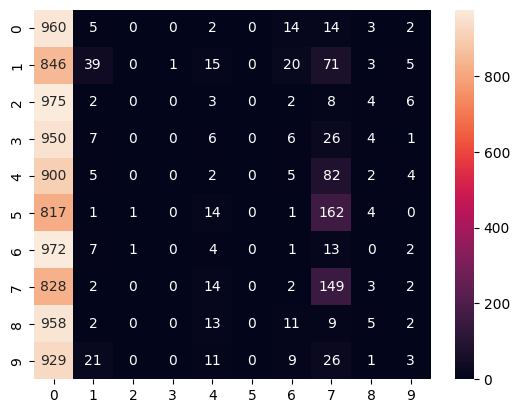

In [97]:
y_pred = model_inception.predict(X_test_inc)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


Improve model using data argument

In [98]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

IMG_SIZE = 128

X_train_resized = tf.image.resize(X_train, (IMG_SIZE, IMG_SIZE))
X_test_resized = tf.image.resize(X_test, (IMG_SIZE, IMG_SIZE))

X_train_inc = preprocess_input(X_train_resized)
X_test_inc = preprocess_input(X_test_resized)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])


base_model = InceptionV3(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False



model_inception_1= models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(num_classes, activation='softmax')
])




In [99]:
model_inception_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [100]:
callbacks = [
    EarlyStopping(patience=8, restore_best_weights=True),
    ReduceLROnPlateau(patience=4, factor=0.3)
]

history_4  = model.fit(
    X_train_inc,
    y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=callbacks
)
test_loss, test_acc = model_inception_1.evaluate(X_test_inc, y_test_cat)
print("Test accuracy:", test_acc)



Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7695 - loss: 0.6651 - val_accuracy: 0.8359 - val_loss: 0.4919 - learning_rate: 8.1000e-07
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7691 - loss: 0.6662 - val_accuracy: 0.8357 - val_loss: 0.4905 - learning_rate: 8.1000e-07
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7690 - loss: 0.6694 - val_accuracy: 0.8342 - val_loss: 0.4928 - learning_rate: 8.1000e-07
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7748 - loss: 0.6560 - val_accuracy: 0.8353 - val_loss: 0.4934 - learning_rate: 8.1000e-07
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7735 - loss: 0.6573 - val_accuracy: 0.8352 - val_loss: 0.4948 - learning_rate: 8.1000e-07
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7733 - loss: 0.6602 - val_accuracy: 0.8356 - val_loss: 0.4958 - learning_rate: 8.1000e-07
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/ste

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_4.history['accuracy'], label='Training')
plt.plot(history_4.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_4.history['loss'], label='Training')
plt.plot(history_4.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:
base_model.trainable = True

for layer in base_model.layers[:-50]:
    layer.trainable = False


In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
history_5 = model.fit(
    X_train_inc,
    y_train_cat,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=callbacks
)
test_loss, test_acc = model.evaluate(X_test_inc, y_test_cat)
print("Test accuracy:", test_acc)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.5553 - loss: 1.2769 - val_accuracy: 0.7788 - val_loss: 0.6345 - learning_rate: 1.0000e-04
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6273 - loss: 1.0664 - val_accuracy: 0.8028 - val_loss: 0.5660 - learning_rate: 1.0000e-04
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6650 - loss: 0.9723 - val_accuracy: 0.8008 - val_loss: 0.5751 - learning_rate: 1.0000e-04
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6865 - loss: 0.9065 - val_accuracy: 0.8061 - val_loss: 0.5631 - learning_rate: 1.0000e-04
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7001 - loss: 0.8685 - val_accuracy: 0.8173 - val_loss: 0.5335 - learning_rate: 1.0000e-04
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7142 - loss: 0.8258 - val_accuracy: 0.8197 - val_loss: 0.5242 - learning_rate: 1.0000e-04
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/ste

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_5.history['accuracy'], label='Training')
plt.plot(history_5.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_5.history['loss'], label='Training')
plt.plot(history_5.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()